In [1]:
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames

from abstract_defs import *
from transformations import *

In [26]:
from scipy.stats import ortho_group 
P = ortho_group.rvs(dim=3)

order_0 = np.array([0, 0, 0])
#eigs = np.array([1+1j, 1-1j, -1])
#P = np.array([[1, 1, 0],
#              [1j, -1j, 0],
#              [0, 0, 1]])
#P_inv = np.linalg.inv(P)
#print(P*np.diag(eigs)*P_inv)
order_1 = np.array([[-0.1, 0, 0],
                    [0, 0.1, 1],
                    [0, -1, 0.1]])
#P = np.array([[1, 2, 3],
#              [1, 1, 1],
#              [1, -2, -3]])
P_inv = np.linalg.inv(P)
order_1_mod = P @ order_1 @ P_inv
order_2 = 1*np.random.rand(3, 3, 3)-0.5
f = VectorPolynomial([order_0, order_1_mod, order_2])
print(f)

entry 1: 0 + 
0.017794510505838523 * x1 + 0.3337244744933654 * x2 + -0.6980572204691933 * x3 + 
0.011317215981794693 * x1^2 + 0.2451806878685422 * x1 * x2 + 0.0060594467596430945 * x1 * x3 + 0.18128889505179158 * x2 * x1 + 0.17470251373378987 * x2^2 + 0.40223522368895626 * x2 * x3 + 0.4684735630649943 * x3 * x1 + -0.4021654015661923 * x3 * x2 + -0.017757811053753847 * x3^2 

entry 2: 0 + 
-0.14681019187836766 * x1 + -0.006248832226588508 * x2 + -0.6761387124869405 * x3 + 
-0.1441503122983252 * x1^2 + 0.4939933907196147 * x1 * x2 + 0.350378915670867 * x1 * x3 + 0.3870989809850486 * x2 * x1 + -0.15154071504199296 * x2^2 + 0.2491107632276991 * x2 * x3 + -0.19156127630571207 * x3 * x1 + -0.38166504018859293 * x3 * x2 + 0.39391827053954986 * x3^2 

entry 3: 0 + 
0.7596727423606076 * x1 + 0.606089734352091 * x2 + 0.08845432172075002 * x3 + 
-0.4774537878737942 * x1^2 + -0.2116128461588035 * x1 * x2 + -0.41307538617931927 * x1 * x3 + -0.08501892866792693 * x2 * x1 + 0.27461790563211363 * x2^2

In [27]:
from utils import conjugate_dynamics

base_point = np.array([0, 0, 0])
x_prime = translate(shift=base_point, dynamics=f, debug=False)
y = diagonalize(x_prime, debug=False)
z = normal_form(y, debug=False)
print(z)

Transformation: x' = x - [0 0 0], y = [[ 0.11220884-5.30938275e-01j -0.12756712-4.67016647e-01j
   0.68639333+7.58008728e-16j]
 [ 0.11220884+5.30938275e-01j -0.12756712+4.67016647e-01j
   0.68639333-7.58008728e-16j]
 [-0.64111422+0.00000000e+00j  0.72886498+0.00000000e+00j
   0.24026733+0.00000000e+00j]]*x', z = y + J(y, y) + K(y, y, y) 
z_dot = entry 1: 0 + 
(0.10000000000000009+0.9999999999999996j) * x1 

entry 2: 0 + 
(0.10000000000000009-0.9999999999999996j) * x2 

entry 3: 0 + 
(-0.1+0j) * x3 




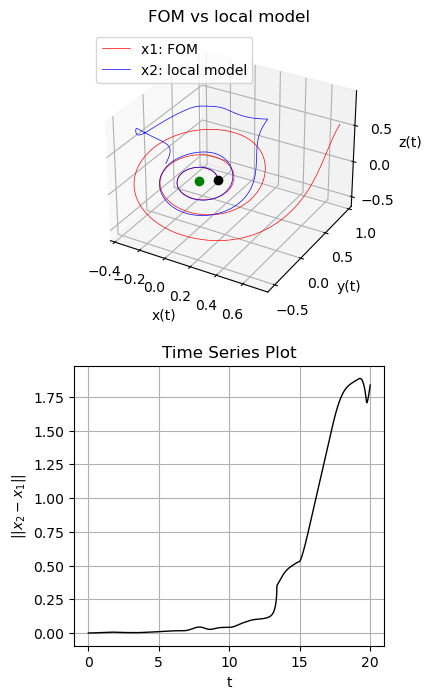

In [29]:
def compare_traces(t, ys1, ys2, base_point):
    x1, y1, z1 = ys1[0:3, :]
    x2, y2, z2 = ys2[0:3, :]
    diff = np.linalg.norm(ys2-ys1, axis=0)
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize = (xsize, ysize))
    fig = plt.figure(figsize=plt.figaspect(2))
    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    ax1.plot(y1, x1, z1, linewidth = 0.5, color = 'r')
    ax1.plot(y2, x2, z2, linewidth = 0.5, color = 'b')
    ax1.plot(y1[0], x1[0], z1[0], 'ko')
    ax1.plot(base_point[1], base_point[0], base_point[2], 'go')   
    ax1.grid(True)
    ax1.set_xlabel('x(t)')
    ax1.set_ylabel('y(t)')
    ax1.set_zlabel('z(t)')
    ax1.set_title('FOM vs local model')
    ax1.legend(['x1: FOM','x2: local model'], loc = 2)
    
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(t, diff, linewidth = 1, color = 'k') 
    ax2.grid(True)
    ax2.set_xlabel('t')
    ax2.set_ylabel('$||x_2-x_1||$')
    ax2.set_title('Time Series Plot')
    
    plt.show()
    return

max_T = 20
npoints = max_T*100+1
offset = 0.1*np.array((1, 1, 0))
t_eval = np.linspace(0, max_T, npoints)
x0 = base_point+offset
sol = integrate.solve_ivp(f, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-10)
t = sol.t
ys = sol.y

ys_pred = conjugate_dynamics(z, t_eval, x0)
compare_traces(t_eval, ys[:, :npoints], ys_pred, base_point)
